In [2]:
import cv2
import os
import numpy as np
import PIL
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib
from collections import defaultdict
import glob
import seaborn as sns
import zipfile
import shutil
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix

In [3]:
input_root = os.path.join(os.getcwd() , "dataset" )
datadir = pathlib.Path(input_root)
datadir

WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset')

In [4]:
list(datadir.glob('*/*.jpg'))

[WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/00ae0969-e9f4-45f4-bfd1-0a0e9bce41d8.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/0149d275-f23d-477c-a5be-4b10f13d1fad.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/01ac46ca-db39-44c6-99b7-ab3c0d90dd20.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/059dcd74-da75-4c2c-93e9-78b60c1333c6.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/074a90b7-3152-414c-80d8-52764ee8fef8.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/0751b08f-c164-447b-a22c-7298c959efaa.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProject/MLProj/dataset/cardboard/07692a5e-eb76-48d6-9848-bb9c3be69f5e.jpg'),
 WindowsPath('c:/Users/Administrator/Desktop/Projectrs/MLProje

In [5]:
class_images_dict = {
    'cardboard' : list(datadir.glob("cardboard/*")),
    'glass' : list(datadir.glob("glass/*")),
    'metal' : list(datadir.glob("metal/*")),
    'paper' : list(datadir.glob("paper/*")),
    'plastic' : list(datadir.glob("plastic/*")),
    'trash' : list(datadir.glob("trash/*")),
}

class_label_dic = {
    'cardboard' : 1,
    'glass' : 2,
    'metal' : 3,
    'paper' : 4,
    'plastic' : 5,
    'trash' : 6,
}
    

In [6]:
# Filter corrupted images
for class_name, image_paths in class_images_dict.items():
    valid_images = []
    for path in image_paths:
        try:
            # Try opening the image
            img = PIL.Image.open(str(path))
            img.verify()  # verify checks for corruption without loading the full image
            valid_images.append(path)
        except (IOError, SyntaxError):
            # If opening fails, skip the image
            print(f"Corrupted image skipped: {path}")
    class_images_dict[class_name] = valid_images

Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\2ec9d19b-8027-4c77-a13f-5eee033b9868.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\31381a44-38d6-4a44-9384-7690727801bc.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\345bdb67-4190-4235-a16f-b60c1556a28d.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\38b3e4da-738c-4694-a946-55101b25ad53.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\4840d678-7af4-4a2d-bda1-338c2f2a59c5.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\509251d8-4e3a-4f1e-aabc-4d034b0f2455.jpg
Corrupted image skipped: c:\Users\Administrator\Desktop\Projectrs\MLProject\MLProj\dataset\cardboard\5b7da318-c2ab-4c29-8ace-19895a890840.jpg
Corrup

Loaded cardboard


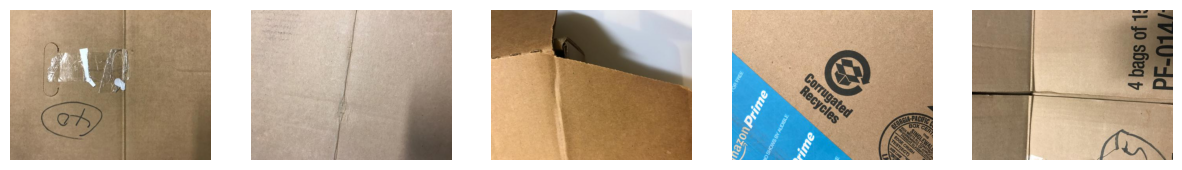

Loaded glass


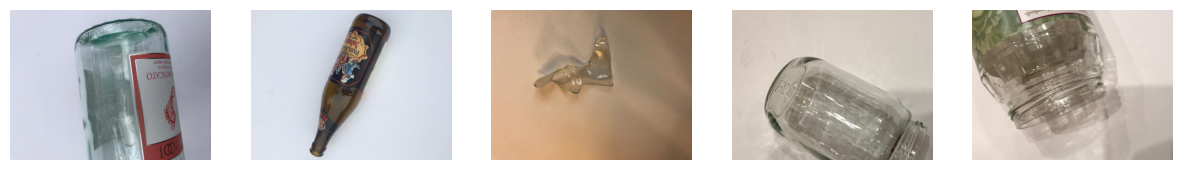

Loaded metal


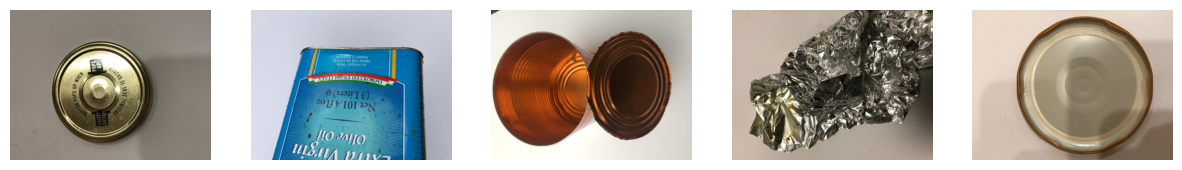

Loaded paper


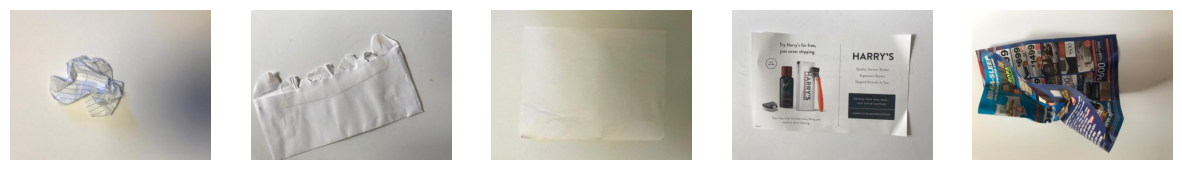

Loaded plastic


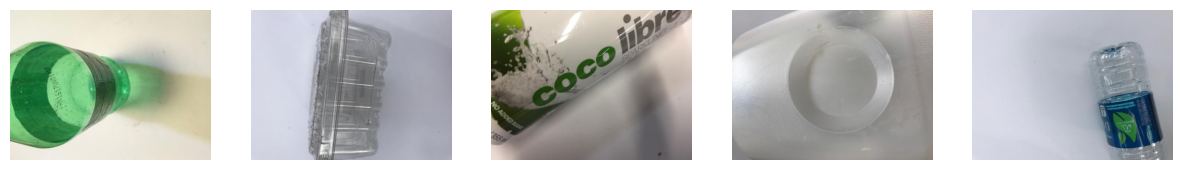

Loaded trash


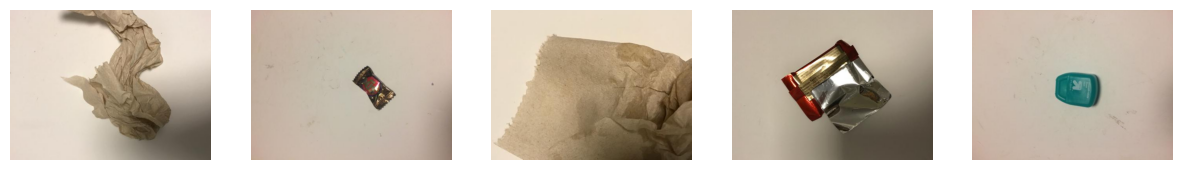

In [7]:
for class_name, image_list in class_images_dict.items():
    images = [PIL.Image.open(p) for p in image_list[:5]]
    
    print(f"Loaded {class_name}")
    
    # Create a figure with 1 row and 5 columns
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

All of my images are 384 X 512 px and the 3 dimensions here represent the color value for the RGB Channel red blue green

In [ ]:
class_features_dic = {}

# TensorFlow image generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,       # rotate images
    horizontal_flip=True,    # flip horizontally
    vertical_flip=True,      # flip vertically
    brightness_range=[0.7,1.3]  # random brightness
)


def add_gaussian_noise(image, mean=0.0, std=0.05):
    noise = np.random.normal(mean, std, image.shape)
    noisy_img = image / 255.0 + noise
    noisy_img = np.clip(noisy_img, 0.0, 1.0)  # keep values in [0,1]
    return (noisy_img * 255).astype(np.uint8)

for class_name , image_paths in class_images_dict.items() :
    features_list = []
    for image_path in image_paths : 
        img = cv2.imread(path)
        if img is None:
            continue  # skip if image not found
            
        # # Convert to grayscale (optional, reduces dimensions)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        # Apply Gaussian noise
        img = add_gaussian_noise(img)
        
        img = np.expand_dims(img, axis=-1)           # now shape is (64,64,1)
        img_exp = np.expand_dims(img, 0) 

        for batch in datagen.flow(img_exp, batch_size=4):
            augmented_img = batch[0].astype(np.uint8)
            
            # Flatten for KNN
            features = augmented_img.flatten() / 255.0
            features_list.append(features)
        
    class_features_dic[class_name] = features_list 
    print(features_list[:5])

KeyboardInterrupt: 

In [28]:
X , y = [] , []
for class_name , features_list in class_features_dic.items() :
    for features in features_list : 
        X.append(features)
        y.append(class_label_dic[class_name])

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=0)

Accuracy: 0.3237

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.38      0.31       126
           2       0.33      0.40      0.36       199
           3       0.29      0.31      0.30       154
           4       0.36      0.38      0.37       203
           5       0.41      0.26      0.32       189
           6       0.06      0.02      0.03        62

    accuracy                           0.32       933
   macro avg       0.29      0.29      0.28       933
weighted avg       0.32      0.32      0.32       933



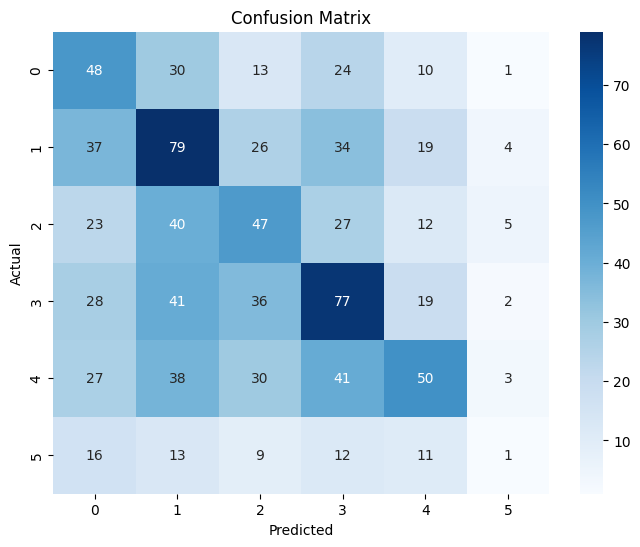

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # you can change n_neighbors
knn.fit(X_train, y_train)

# 3️⃣ Predict on test set
y_pred = knn.predict(X_test)

# 4️⃣ Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5️⃣ Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()